
# Klasterizacija

Cilj ovog projekta jeste kategorizovati države po stepenu razvijenosti na osnovu socio-ekonomskih i zdravstvenih faktora. Dataset je preuzet sa linka: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

#  Deskripcija podataka

In [224]:
import seaborn as sb
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
palette = sb.color_palette("Paired")

In [226]:
df = pd.read_csv('C:/Users/Bojana/Desktop/MASINSKO UCENJE/II projekat/archive/Country-data.csv', sep=',')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [227]:
df2 = pd.read_csv('C:/Users/Bojana/Desktop/MASINSKO UCENJE/II projekat/archive/data-dictionary.csv',sep=',')
print(df2)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


In [228]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [229]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [230]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [231]:
df.isnull().values.any()

False

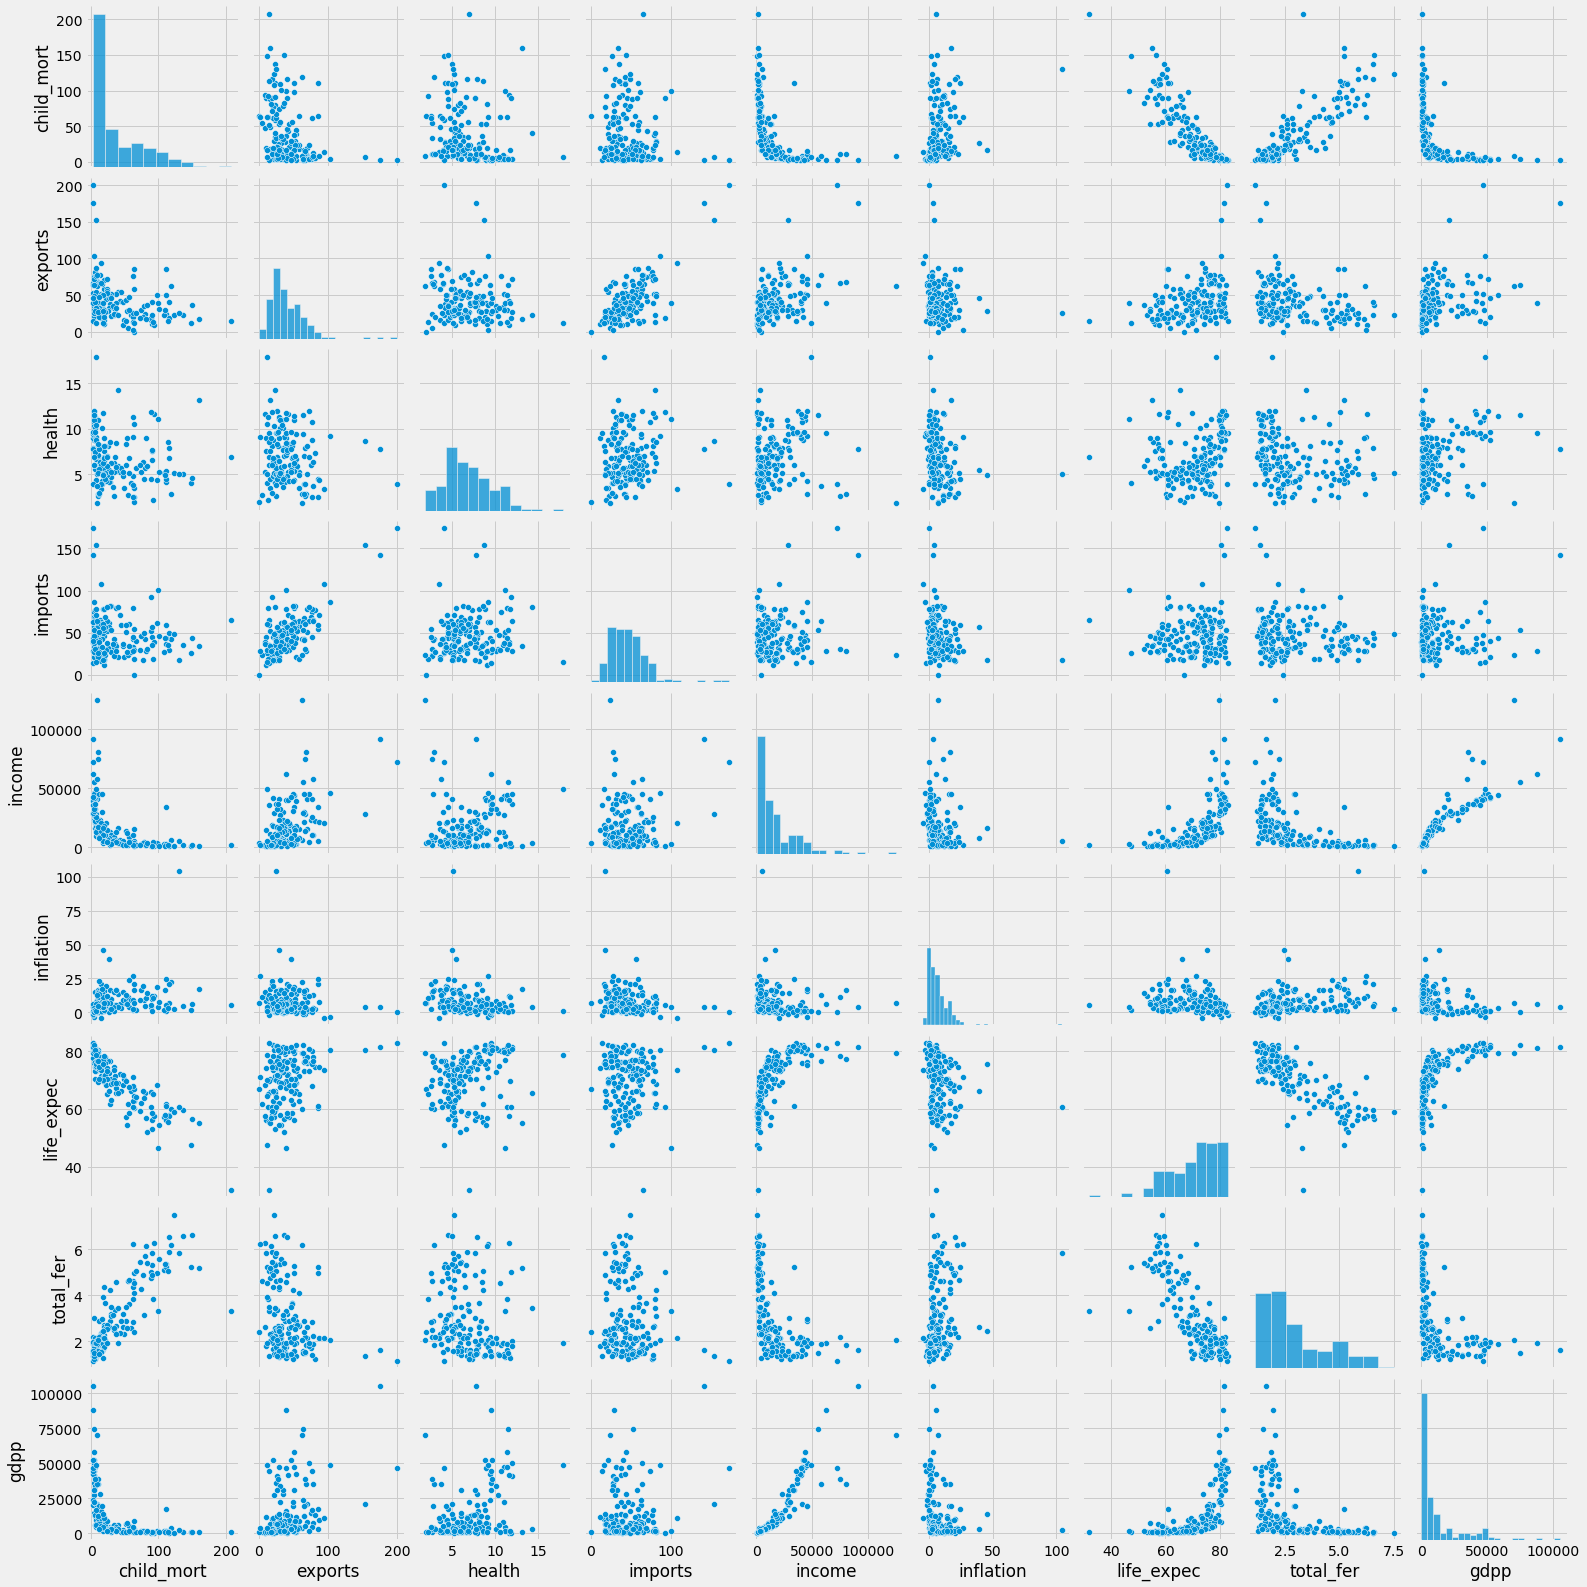

In [232]:
data = pd.DataFrame(df.iloc[:,1:])
sb.pairplot(data)

# Transformacija podataka i redukcija dimenzionalnosti

[]

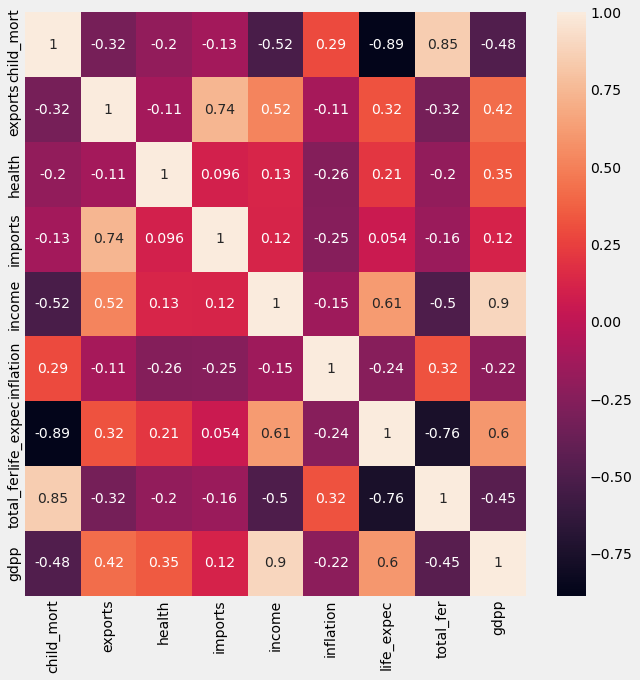

In [233]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.plot()

# PCA

In [234]:
scaled_data = StandardScaler().fit_transform(data)

Total no. of principal components = 9


<function matplotlib.pyplot.show(close=None, block=None)>

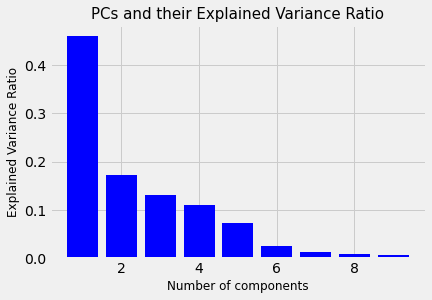

In [235]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(scaled_data)
print('Total no. of principal components =',pc.n_components_)
variance = pc.explained_variance_ratio_
plt.bar([i+1 for i, _ in enumerate(variance)],variance,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show

# K means

In [236]:
sse=[] #Square root error
silhouette_coefficients = []
cal_har_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    
    sse.append(kmeans.inertia_)
    score = silhouette_score(data, kmeans.labels_)
    ch_score = calinski_harabasz_score(data,kmeans.labels_)
    
    silhouette_coefficients.append(score)
    cal_har_coefficients.append(ch_score)

<function matplotlib.pyplot.show(close=None, block=None)>

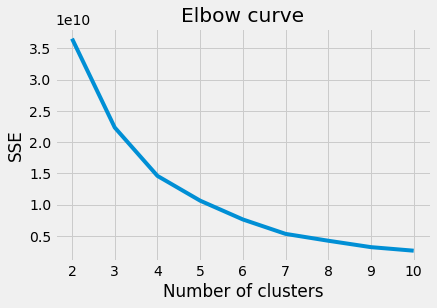

In [237]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),sse)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow curve')
plt.show

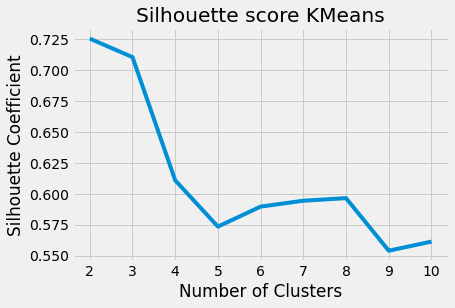

In [238]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette score KMeans')
plt.show()

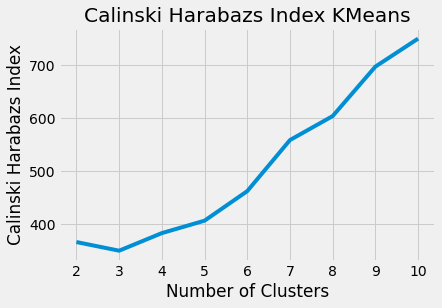

In [239]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), cal_har_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski Harabazs Index")
plt.title('Calinski Harabazs Index KMeans')
plt.show()

In [240]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(scaled_data)
pred = kmeans.labels_
data['Cluster'] = pred

<AxesSubplot:xlabel='child_mort', ylabel='gdpp'>

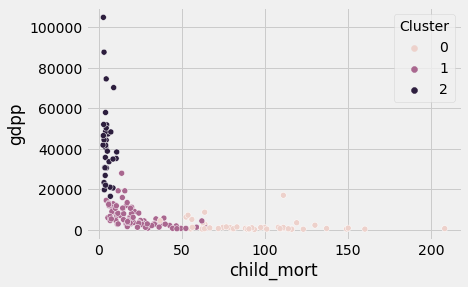

In [241]:
sb.scatterplot(x = data['child_mort'], y = data['gdpp'],hue='Cluster',data = data)

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

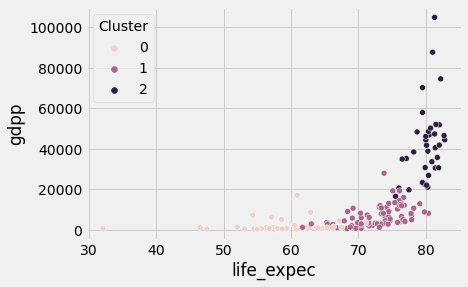

In [242]:
sb.scatterplot(x = data['life_expec'], y = data['gdpp'],hue='Cluster',data = data)

<AxesSubplot:xlabel='inflation', ylabel='gdpp'>

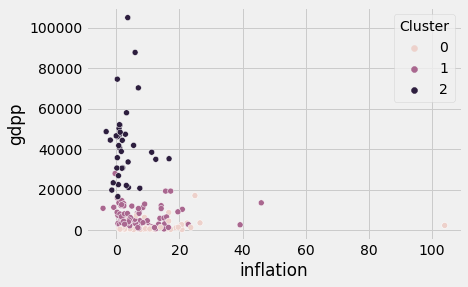

In [243]:
sb.scatterplot(x = data['inflation'], y = data['gdpp'],hue='Cluster',data = data)

In [244]:
df['Cluster'] = data['Cluster']

# Top 5 and Bottom 5 countries of each Category

In [245]:
def get5(col,return_df=False,place='Top'):
    
    c5 = df[['country',col]].sort_values(by=col,ascending=False)
    if place=='Top':
        c5 = c5.head()
    elif place=='Bottom':
        c5 = c5.tail()
    else:
        raise ValueError('place can be "Top" or "Bottom"')
    plt.figure(figsize=(7,7))
    plt.title(f'{place} 5 countries in {col} category')
    sb.barplot(data=c5,y='country',x=col)
    
    plt.show()
    if return_df:
        return top5

In [246]:
## Top 5

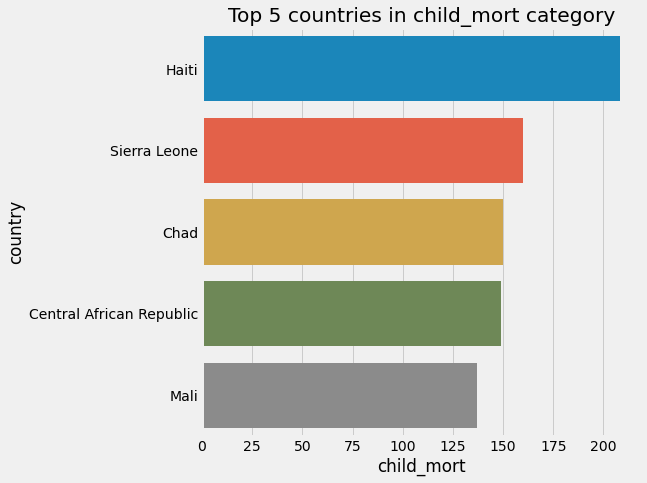

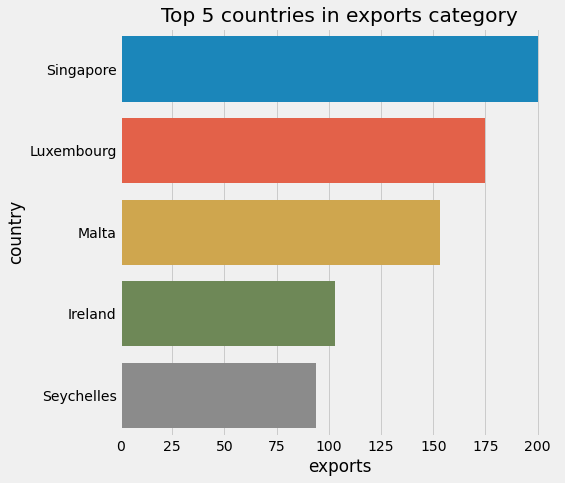

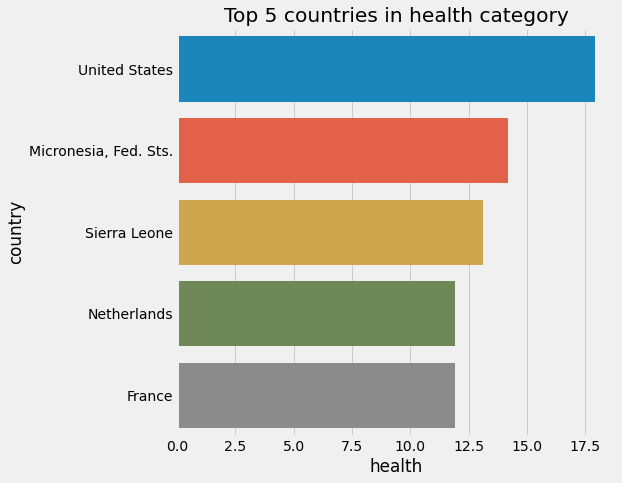

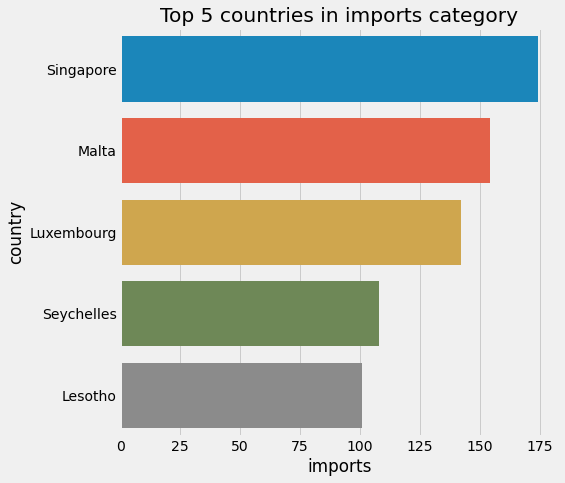

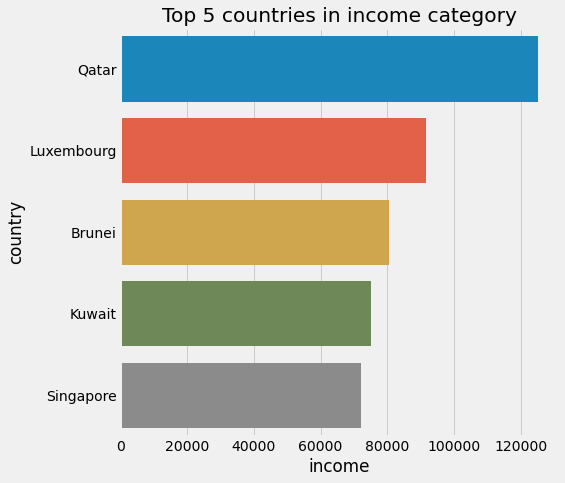

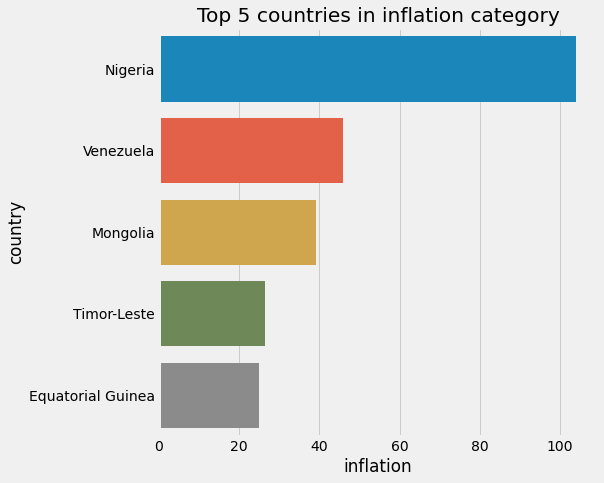

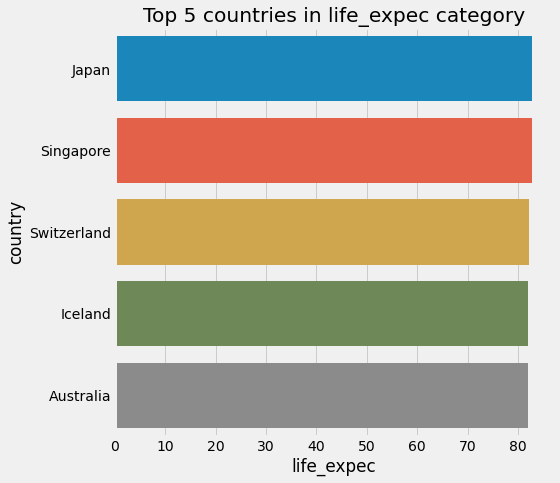

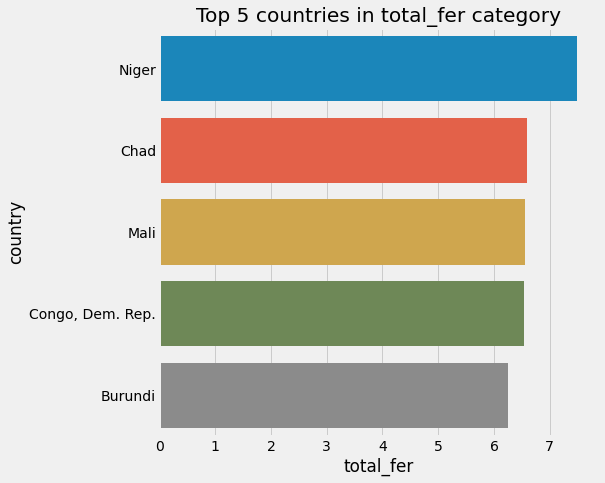

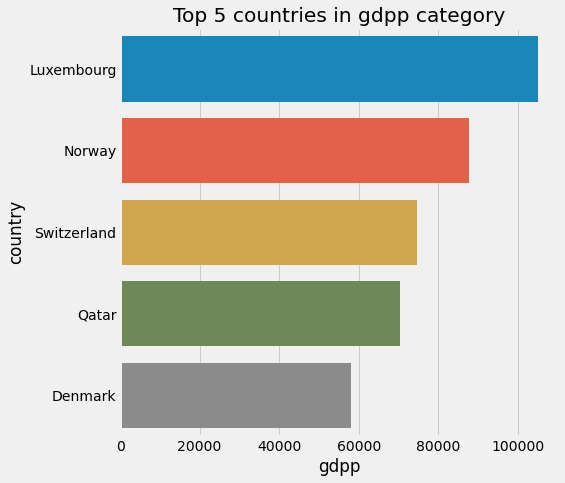

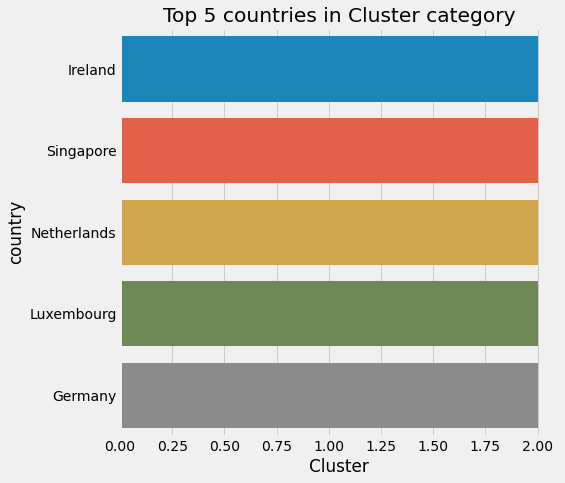

In [247]:
for col in df.columns[1:]:
    get5(col)
    print('\n')

In [248]:
## Bottom 5

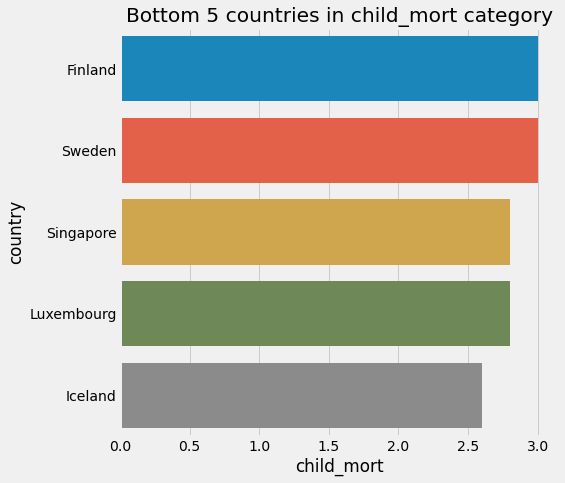

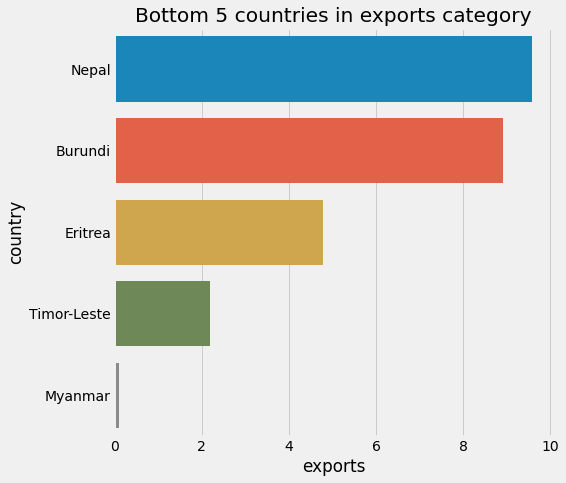

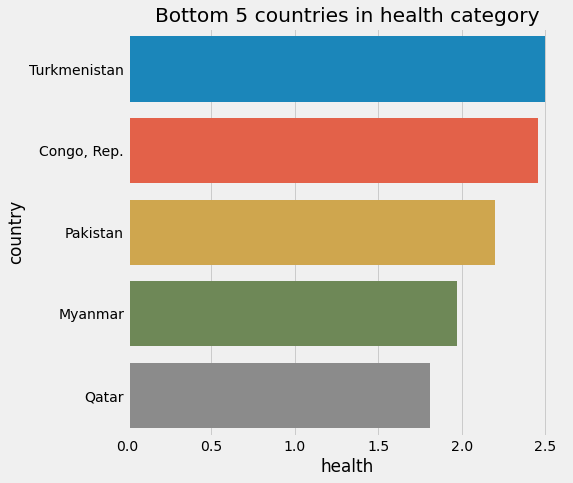

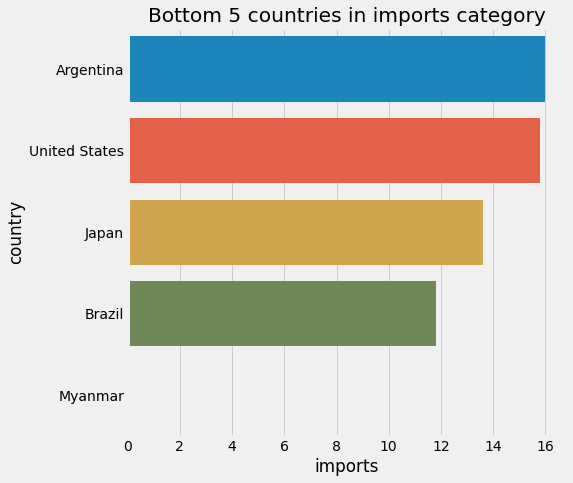

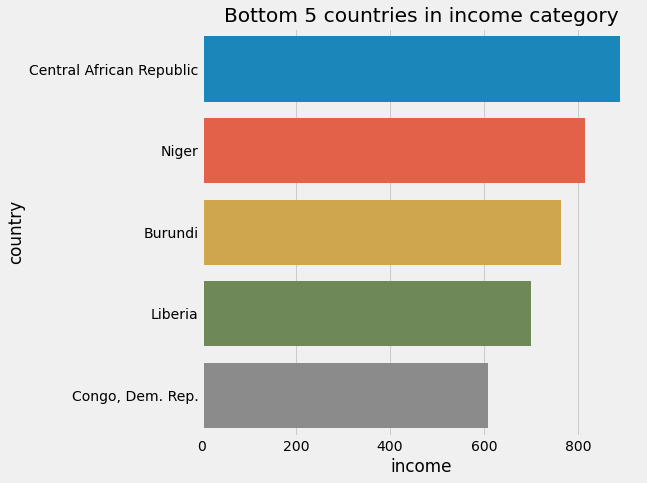

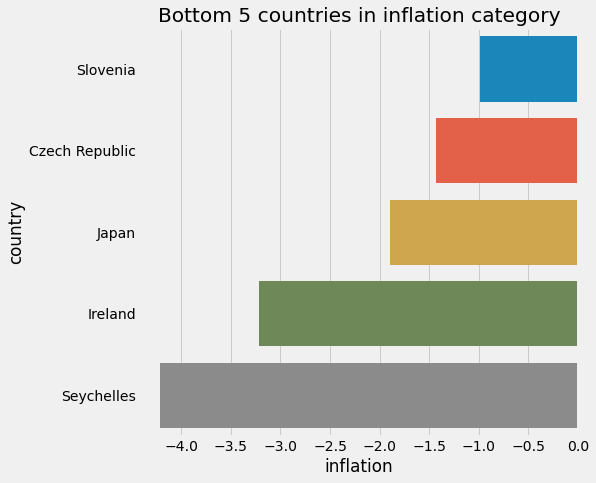

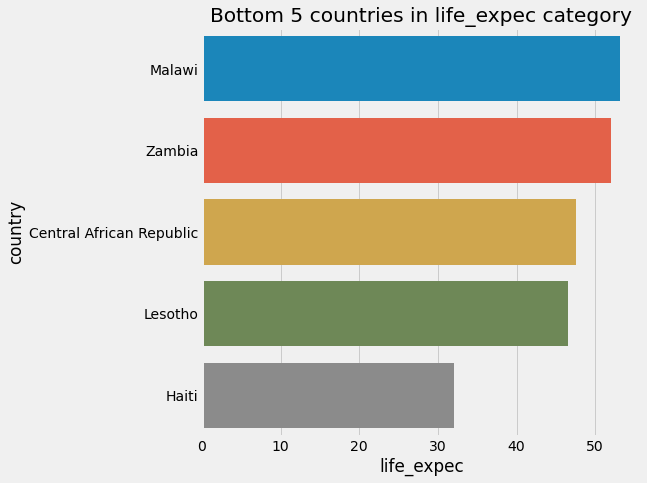

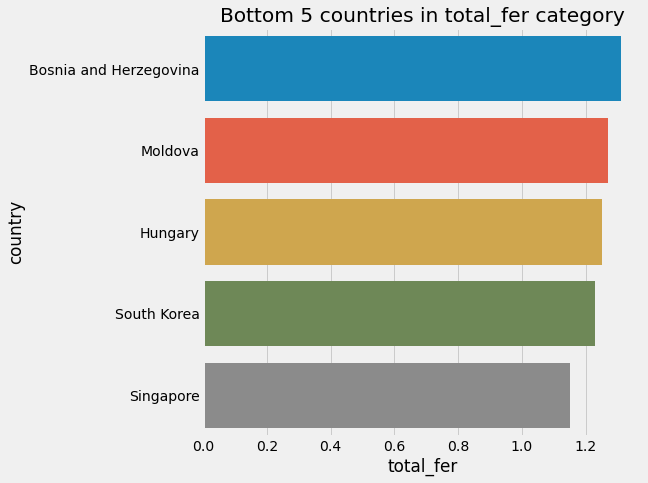

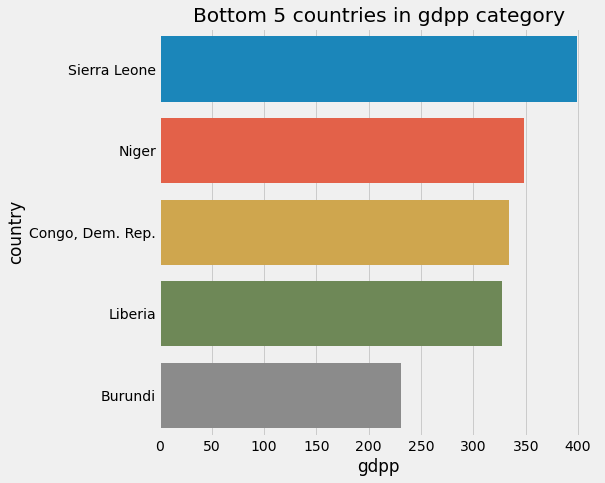

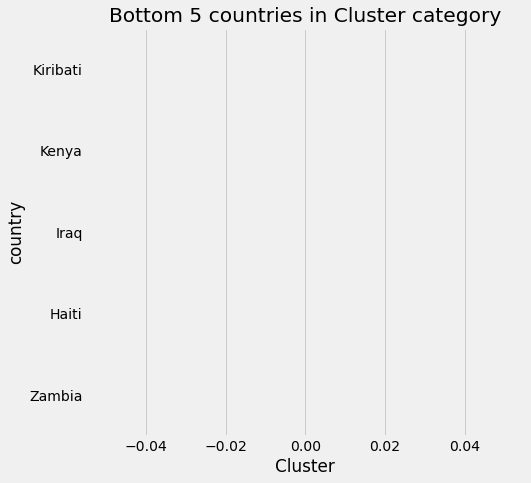

In [249]:
for col in df.columns[1:]:
    get5(col,place='Bottom')
    print('\n')

In [250]:
def how_developed(country, df):
    d = {
     0:'developed' ,
     1:'developing',
     2:'underdeveoped'
    }
    index = df['country'].loc[lambda x: x==country].index[0]
    cluster = df['Cluster'][index]
    print(country,' is ', d[cluster])
    
how_developed('Serbia',df)


Serbia  is  developing


In [251]:
def how_developed(country, df):
    d = {
     0:'developed' ,
     1:'developing',
     2:'underdeveoped'
    }
    index = df['country'].loc[lambda x: x==country].index[0]
    cluster = df['Cluster'][index]
    print(country,' is ', d[cluster])
    
how_developed('France',df)

France  is  underdeveoped


In [252]:
def how_developed(country, df):
    d = {
     0:'developed' ,
     1:'developing',
     2:'underdeveoped'
    }
    index = df['country'].loc[lambda x: x==country].index[0]
    cluster = df['Cluster'][index]
    print(country,' is ', d[cluster])
    
how_developed('Zambia',df)

Zambia  is  developed


# DBSCAN

In [253]:
from sklearn.cluster import DBSCAN
sse=[] #Square root error
silhouette_coefficients = []
cal_har_coefficients = []
# del data['Cluster']
for k in range(2,11):
    dbscan = DBSCAN(min_samples=k,eps=1.1).fit(scaled_data)
    score = silhouette_score(data, dbscan.labels_)
    ch_score = calinski_harabasz_score(data,dbscan.labels_)
    silhouette_coefficients.append(score)
    cal_har_coefficients.append(ch_score)

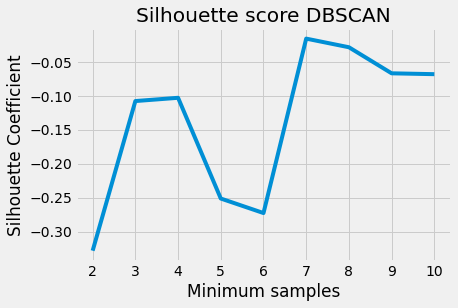

In [254]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Minimum samples")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette score DBSCAN')
plt.show()

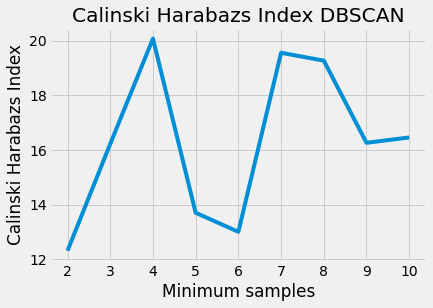

In [255]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), cal_har_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Minimum samples")
plt.ylabel("Calinski Harabazs Index")
plt.title('Calinski Harabazs Index DBSCAN')
plt.show()

<AxesSubplot:xlabel='income', ylabel='gdpp'>

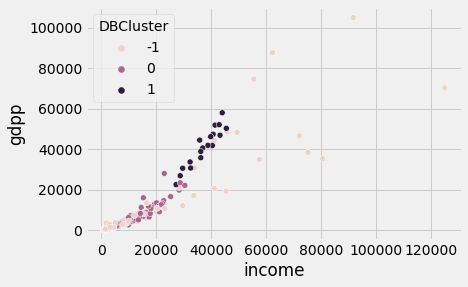

In [256]:
dbscan = DBSCAN(min_samples=8,eps=1.15).fit(scaled_data)
data['DBCluster'] = dbscan.labels_
sb.scatterplot(x = data['income'], y = data['gdpp'],hue='DBCluster',data = data)

<AxesSubplot:xlabel='inflation', ylabel='gdpp'>

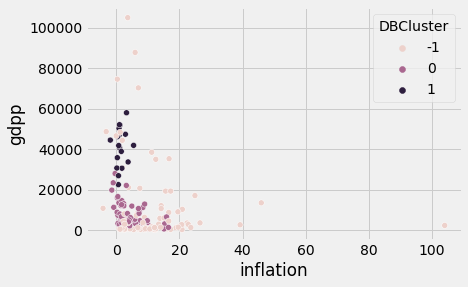

In [257]:
sb.scatterplot(x = data['inflation'], y = data['gdpp'],hue='DBCluster',data = data)

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

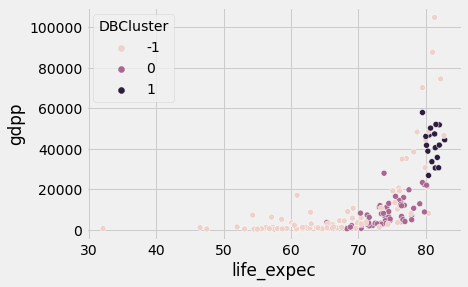

In [258]:
sb.scatterplot(x = data['life_expec'], y = data['gdpp'],hue='DBCluster',data = data)

<AxesSubplot:xlabel='child_mort', ylabel='gdpp'>

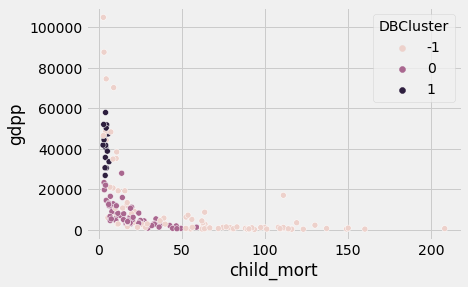

In [259]:
sb.scatterplot(x = data['child_mort'], y = data['gdpp'],hue='DBCluster',data = data)

DBSCAN algoritam ne radi dobar posao kao KMeans algoritam


# Hierarhijsko klasterovanje

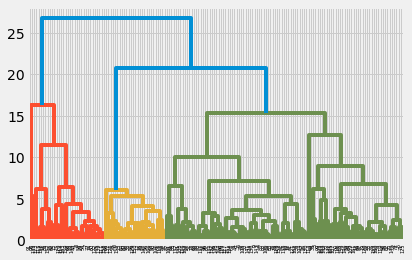

In [260]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_data,method='ward'))

In [261]:
silhouette_coefficients = []
cal_har_coefficients = []
del data['DBCluster']
for k in range(2,11):
    hclustering = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'ward')
    hclustering.fit(scaled_data)
    score = silhouette_score(data, hclustering.labels_)
    ch_score = calinski_harabasz_score(data,hclustering.labels_)
    silhouette_coefficients.append(score)
    cal_har_coefficients.append(ch_score)

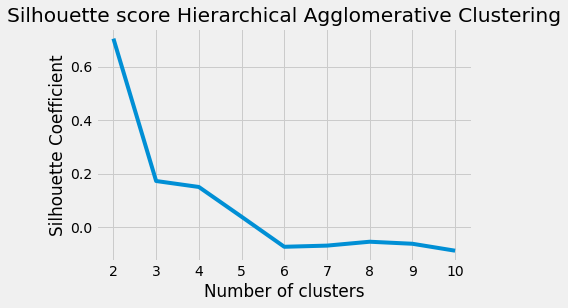

In [262]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette score Hierarchical Agglomerative Clustering')
plt.show()

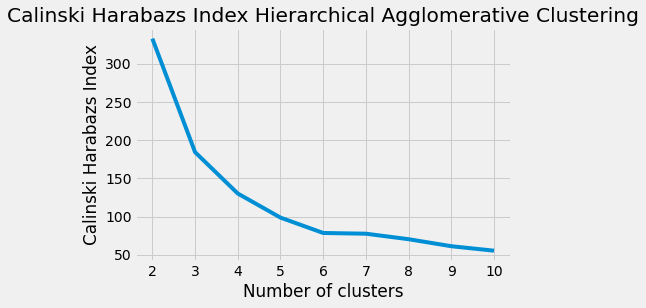

In [263]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), cal_har_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski Harabazs Index")
plt.title('Calinski Harabazs Index Hierarchical Agglomerative Clustering')
plt.show()

<AxesSubplot:xlabel='child_mort', ylabel='gdpp'>

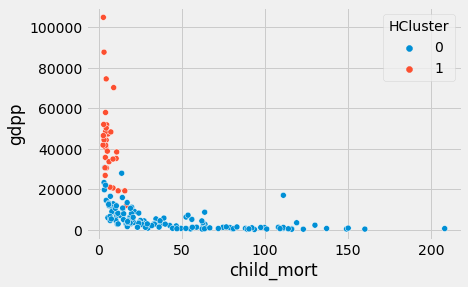

In [264]:
hclustering = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
hclustering.fit(scaled_data)
data['HCluster'] = hclustering.labels_
sb.scatterplot(x = data['child_mort'], y = data['gdpp'],hue='HCluster',data = data)

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

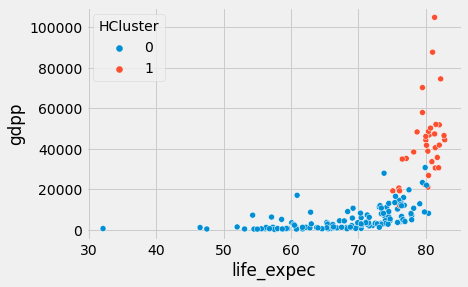

In [265]:
sb.scatterplot(x = data['life_expec'], y = data['gdpp'],hue='HCluster',data = data)

<AxesSubplot:xlabel='inflation', ylabel='gdpp'>

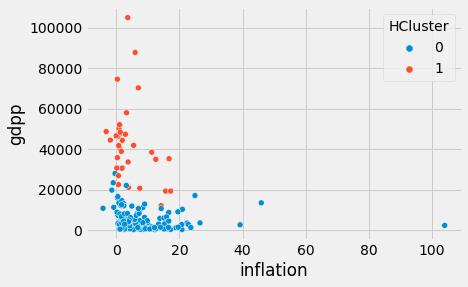

In [266]:
sb.scatterplot(x = data['inflation'], y = data['gdpp'],hue='HCluster',data = data)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

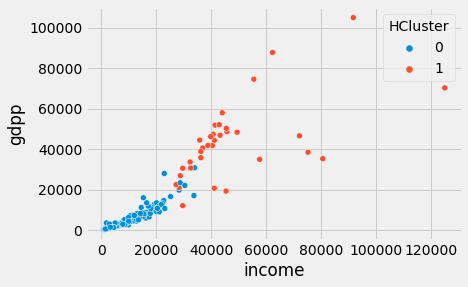

In [267]:
sb.scatterplot(x = data['income'], y = data['gdpp'],hue='HCluster',data = data)

Algoritam za hijerarhijsko klasterovanje pokazuje bolje rezultate od DBSCAN algoritma međutim mali broj država stavlja u grupu 'nerazvijenih' zemalja što možda i nije baš najbolja kategorizacija. Samim tim zaključujemo da je KMeans algoritam najbolji za rešavanje ovog problema.